Week 2 - Project: Sales & Customer Behaviour Insights – Green Cart Ltd notebook

1) Load the data

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [35]:

# Load all my CSV files first
from pathlib import Path
import pandas as pd

# The CSV files are in the same folder as this notebook
data_dir = Path('.')  

# File paths
sales_path    = data_dir / 'sales_data.csv'
product_path  = data_dir / 'product_info.csv'
customer_path = data_dir / 'customer_info.csv'   

# Read the files into pandas DataFrames
sales_df    = pd.read_csv(sales_path)
product_df  = pd.read_csv(product_path)
customer_df = pd.read_csv(customer_path)

# Just checking the shape of each file to make sure they loaded correctly
print('Loaded shapes -> sales:', sales_df.shape, '| products:', product_df.shape, '| customers:', customer_df.shape)


Loaded shapes -> sales: (3000, 10) | products: (30, 6) | customers: (500, 6)


In [ ]:
2) Clean Data

- Standardise text with .str.strip(), .str.lower(), .str.title()
- Convert date columns with pd.to_datetime()
- Audit and handle missing values (.isnull().sum()); fill where appropriate
- Remove duplicates with .duplicated() / .drop_duplicates()
- Validate or clean numeric columns


In [36]:

def standardize_text(s: pd.Series, case='title'):
    s = s.astype('string').str.strip()
    if case == 'lower':
        return s.str.lower()
    if case == 'upper':
        return s.str.upper()
    return s.str.lower().str.title()

a) Sales cleaning

In [37]:
# sales cleaning
# Standardise text columns
for col in ['delivery_status','payment_method','region']:
    if col in sales_df.columns:
        sales_df[col] = standardize_text(sales_df[col], 'title')

In [38]:
# Ensure numeric
for col in ['quantity','unit_price','discount_applied']:
    if col in sales_df.columns:
        sales_df[col] = pd.to_numeric(sales_df[col], errors='coerce')

In [39]:
# Dates
if 'order_date' in sales_df.columns:
    sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce')

In [26]:
# Missing audit (before)
display('Missing (sales) BEFORE:')
display(sales_df.isnull().sum())

'Missing (sales) BEFORE:'

order_id               1
customer_id            2
product_id             5
quantity               5
unit_price             1
order_date          1820
delivery_status        3
payment_method         3
region                 0
discount_applied     517
dtype: int64

In [40]:
# Fills
if 'discount_applied' in sales_df.columns:
    sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)
for col in ['payment_method','region']:
    if col in sales_df.columns:
        sales_df[col] = sales_df[col].fillna('Unknown')
if 'delivery_status' in sales_df.columns:
    sales_df['delivery_status'] = sales_df['delivery_status'].map({
        'Delivered':'Delivered','Delayed':'Delayed','Cancelled':'Cancelled','Canceled':'Cancelled'
    }).fillna('Unknown')

In [41]:
# Validate numerics: drop impossible negatives
invalid_mask = pd.Series(False, index=sales_df.index)
for col in ['quantity','unit_price','discount_applied']:
    if col in sales_df.columns:
        invalid_mask |= (sales_df[col] < 0)
rows_dropped_sales = int(invalid_mask.sum())
sales_df = sales_df.loc[~invalid_mask].copy()

In [42]:
# Duplicates
dupes_sales = int(sales_df.duplicated(subset=['order_id']).sum()) if 'order_id' in sales_df.columns else int(sales_df.duplicated().sum())
if 'order_id' in sales_df.columns:
    sales_df = sales_df.drop_duplicates(subset=['order_id']).copy()
else:
    sales_df = sales_df.drop_duplicates().copy()

In [30]:
print('\nRows dropped (sales, invalid negatives):', rows_dropped_sales)
print('Duplicates dropped (sales):', dupes_sales)
print('\nMissing (sales) AFTER:')
print(sales_df.isnull().sum())


Rows dropped (sales, invalid negatives): 0
Duplicates dropped (sales): 2

Missing (sales) AFTER:
order_id               1
customer_id            2
product_id             5
quantity               5
unit_price             1
order_date          1818
delivery_status        0
payment_method         0
region                 0
discount_applied       0
dtype: int64


 Defaults like `discount_applied=0.0 and negatives row were dropped

2b) Product cleaning

In [43]:
# Product cleaning 
for col in ['product_name','category','supplier_code']:
    if col in product_df.columns:
        product_df[col] = standardize_text(product_df[col], 'title')

In [44]:
if 'launch_date' in product_df.columns:
    product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], errors='coerce')


C:\Users\Dell\AppData\Local\Temp\ipykernel_10608\816787355.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], errors='coerce')


In [46]:
if 'base_price' in product_df.columns:
    product_df['base_price'] = pd.to_numeric(product_df['base_price'], errors='coerce')


In [47]:
display('Missing (products) BEFORE:')
display(product_df.isnull().sum())

'Missing (products) BEFORE:'

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [50]:
# Fills
if 'category' in product_df.columns:
    product_df['category'] = product_df['category'].fillna('Unknown')
if 'product_name' in product_df.columns:
    product_df['product_name'] = product_df['product_name'].fillna('Unknown')
if 'base_price' in product_df.columns:
    product_df['base_price'] = product_df['base_price'].fillna(0.0)

In [51]:
# Remove negative base price
neg_base = int((product_df['base_price'] < 0).sum()) if 'base_price' in product_df.columns else 0
if 'base_price' in product_df.columns:
    product_df = product_df.loc[product_df['base_price'] >= 0].copy()

In [52]:

# Duplicates
dupes_prod = int(product_df.duplicated(subset=['product_id']).sum()) if 'product_id' in product_df.columns else int(product_df.duplicated().sum())
if 'product_id' in product_df.columns:
    product_df = product_df.drop_duplicates(subset=['product_id']).copy()
else:
    product_df = product_df.drop_duplicates().copy()

In [53]:
# check missing values after product data cleaning
display(product_df.isnull().sum())

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

2) Customer cleaning

In [54]:

# --Customer cleaning 
for col in ['gender','region']:
    if col in customer_df.columns:
        customer_df[col] = standardize_text(customer_df[col], 'title')

In [55]:
if 'email' in customer_df.columns:
    customer_df['email'] = customer_df['email'].astype('string').str.strip().str.lower()

In [90]:
product_df['launch_date'] = pd.to_datetime(
    product_df['launch_date'],
    format='%d-%m-%y',
    errors='coerce'
)


In [57]:

# Loyalty tier normalisation
if 'loyalty_tier' in customer_df.columns:
    lt = customer_df['loyalty_tier'].astype('string').str.strip().str.lower()
    lt_map = {'bronze':'Bronze','silver':'Silver','gold':'Gold'}
    customer_df['loyalty_tier'] = lt.map(lt_map).fillna('Unknown')

In [59]:
display('Missing (customers) BEFORE:')
display(customer_df.isnull().sum())

'Missing (customers) BEFORE:'

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    0
dtype: int64

In [60]:
# Fills
for col in ['region','gender','email','loyalty_tier']:
    if col in customer_df.columns:
        default = {'region':'Unknown','gender':'Unknown','email':'unknown@example.com','loyalty_tier':'Unknown'}[col]
        customer_df[col] = customer_df[col].fillna(default)

In [61]:
# Duplicates
dupes_cust = int(customer_df.duplicated(subset=['customer_id']).sum()) if 'customer_id' in customer_df.columns else int(customer_df.duplicated().sum())
if 'customer_id' in customer_df.columns:
    customer_df = customer_df.drop_duplicates(subset=['customer_id']).copy()
else:
    customer_df = customer_df.drop_duplicates().copy()

In [62]:
print('\nDuplicates dropped (customers):', dupes_cust)
print('\nMissing (customers) AFTER:')
print(customer_df.isnull().sum())


Duplicates dropped (customers): 2

Missing (customers) AFTER:
customer_id     1
email           0
signup_date     4
gender          0
region          0
loyalty_tier    0
dtype: int64


3) Merge the Data

In [63]:
# Left-join to preserve all sales
merged_df = sales_df.merge(product_df, on='product_id', how='left', suffixes=('','_prod'))
merged_df = merged_df.merge(customer_df, on='customer_id', how='left', suffixes=('','_cust'))

In [64]:
# inspesct the merged dataset to confirm the join worked correctly
merged_df.info()
display(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2997 non-null   object        
 1   customer_id       2996 non-null   object        
 2   product_id        2993 non-null   object        
 3   quantity          2993 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        1180 non-null   datetime64[ns]
 6   delivery_status   2998 non-null   object        
 7   payment_method    2998 non-null   string        
 8   region            2998 non-null   string        
 9   discount_applied  2998 non-null   float64       
 10  product_name      2993 non-null   string        
 11  category          2993 non-null   string        
 12  launch_date       2993 non-null   datetime64[ns]
 13  base_price        2993 non-null   float64       
 14  supplier_code     2993 n

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_cust,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


4) Feature Engineering

In [66]:
# revenue
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'].clip(lower=0, upper=1))

In [65]:
# order_week (ISO) + order_year
iso = merged_df['order_date'].dt.isocalendar()
merged_df['order_week'] = iso['week']
merged_df['order_year'] = iso['year']

In [67]:
# price_band from unit_price
bins = [-np.inf, 15, 30, np.inf]
labels = ['Low','Medium','High']
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins=bins, labels=labels, right=True)

In [68]:
# days_to_order
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [69]:
# email_domain
merged_df['email_domain'] = merged_df['email'].astype('string').str.split('@').str[-1]

In [70]:
# is_late
merged_df['is_late'] = merged_df['delivery_status'].eq('Delayed')


In [71]:
merged_df.to_csv('merged_df.csv', index=False)
print('Saved merged_df -> /mnt/data/merged_df.csv')
display(merged_df[['order_id','revenue','order_week','order_year','price_band','days_to_order','email_domain','is_late']].head())

Saved merged_df -> /mnt/data/merged_df.csv


,order_id,revenue,order_week,order_year,price_band,days_to_order,email_domain,is_late
0,O966977,117.750,23,2025,High,423.0,mills-logan.com,False
1,O696648,94.600,23,2025,Medium,140.0,morgan.com,True
2,O202644,25.228,28,2025,Medium,104.0,walters-smith.com,False
3,O501803,26.208,32,2025,High,388.0,gmail.com,False
4,O322242,38.096,32,2025,High,168.0,hotmail.com,True


In [ ]:
5) Create Summary Tables

In [72]:
# Weekly revenue trends by region
weekly_revenue_region = (
    merged_df.dropna(subset=['order_year','order_week'])
    .groupby(['order_year','order_week','region'], dropna=False)['revenue'].sum()
    .reset_index().sort_values(['order_year','order_week','region'])
)

In [73]:
# Product category performance
category_perf = (
    merged_df.groupby(['category'], dropna=False)
    .agg(revenue=('revenue','sum'), quantity=('quantity','sum'), avg_discount=('discount_applied','mean'))
    .reset_index().sort_values('revenue', ascending=False)
)

In [74]:
# Customer behaviour by loyalty_tier & signup_month
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M').astype(str)
cust_behaviour = (
    merged_df.groupby(['loyalty_tier','signup_month'], dropna=False)
    .agg(orders=('order_id','nunique'), revenue=('revenue','sum'))
    .reset_index().sort_values(['loyalty_tier','signup_month'])
)

In [75]:
# Delivery performance by region & price_band
delivery_perf = (
    merged_df.groupby(['region','price_band'], dropna=False, observed=False)
    .agg(orders=('order_id','nunique'), delayed=('is_late','sum'))
    .reset_index()
)
delivery_perf['delay_rate'] = (delivery_perf['delayed'] / delivery_perf['orders']).fillna(0.0)

In [76]:
# Preferred payment methods by loyalty_tier
payment_pref = (
    merged_df.groupby(['loyalty_tier','payment_method'], dropna=False)
    .agg(orders=('order_id','nunique'), revenue=('revenue','sum'))
    .reset_index().sort_values(['loyalty_tier','orders'], ascending=[True, False])
)

In [77]:
display(weekly_revenue_region.head(10))
display(category_perf.head(10))
display(cust_behaviour.head(10))
display(delivery_perf.head(10))
display(payment_pref.head(10))

,order_year,order_week,region,revenue
0,2025,1,East,173.8310
1,2025,1,North,20.7825
2,2025,1,South,55.8790
3,2025,1,West,325.3200
4,2025,2,Central,2248.1720
5,2025,2,East,838.7470
6,2025,2,North,1144.9655
7,2025,2,South,2233.7900
8,2025,2,West,1512.9210
9,2025,6,Central,1258.0525


,category,revenue,quantity,avg_discount
0,Cleaning,93621.7840,3584.0,0.085685
4,Storage,46931.4575,1730.0,0.080763
2,Outdoors,40062.0680,1523.0,0.082150
1,Kitchen,33933.6760,1226.0,0.075622
3,Personal Care,24916.6365,902.0,0.086755
5,<NA>,610.6565,22.0,0.150000


,loyalty_tier,signup_month,orders,revenue
0,Bronze,2024-01,10,478.6450
1,Bronze,2024-02,23,1843.8570
2,Bronze,2024-03,11,1142.6895
3,Bronze,2024-04,1,71.2800
4,Bronze,2024-05,4,273.6810
5,Bronze,2024-07,36,2605.6500
6,Bronze,2024-08,35,3065.1350
7,Bronze,2024-09,33,2685.6645
8,Bronze,2024-10,54,4241.0205
9,Bronze,2024-11,30,2416.9220


,region,price_band,orders,delayed,delay_rate
0,Central,Low,113,43,0.380531
1,Central,Medium,225,88,0.391111
2,Central,High,265,104,0.392453
3,Central,NaN,0,0,0.000000
4,East,Low,96,40,0.416667
5,East,Medium,238,101,0.424370
6,East,High,267,109,0.408240
7,East,NaN,1,0,0.000000
8,North,Low,107,41,0.383178
9,North,Medium,204,90,0.441176


,loyalty_tier,payment_method,orders,revenue
1,Bronze,Credit Card,278,22020.6765
0,Bronze,Bank Transfer,178,13935.5590
2,Bronze,Paypal,160,12403.4835
5,Gold,Credit Card,835,66804.1945
6,Gold,Paypal,425,35087.3635
3,Gold,Bank Transfer,401,33671.0485
7,Gold,Unknown,2,104.4030
4,Gold,Bank Transfr,1,35.8080
9,Silver,Credit Card,300,22967.0835
8,Silver,Bank Transfer,191,15752.9605


6) Visual Exploration (Metplotlib and Seaborn)

In [78]:
# ---Visualization Setup
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure charts folder exists
charts_dir = Path('charts')
charts_dir.mkdir(parents=True, exist_ok=True)

print(f"Charts will be saved in: {charts_dir.resolve()}")




Charts will be saved in: C:\Users\Dell\charts


1) Line plot - weekly revenue trends by region 

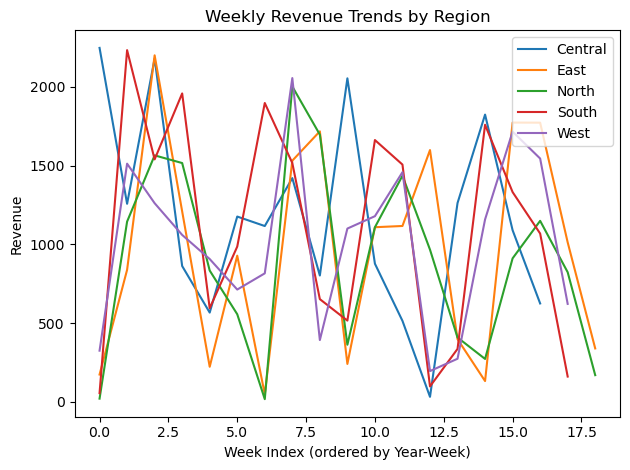

In [79]:
# 1) Line: weekly revenue by region
plt.figure()
for region, g in weekly_revenue_region.groupby('region'):
    idx = range(len(g))
    plt.plot(idx, g['revenue'], label=str(region))
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('Week Index (ordered by Year-Week)')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.savefig(charts_dir/'weekly_revenue_by_region.png', dpi=160)
plt.show()

2) Bar chart - top 5 categories by revenue 

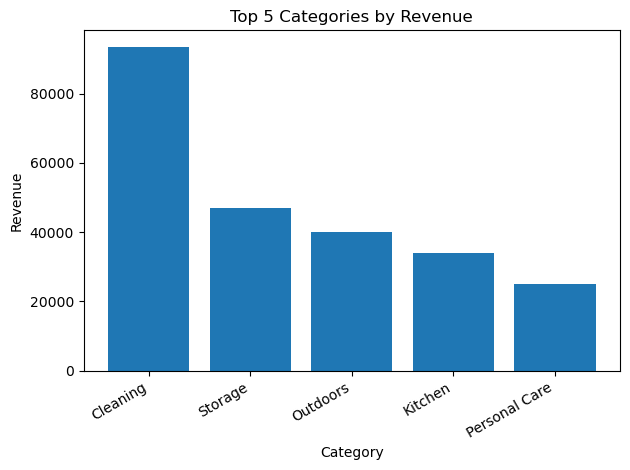

In [80]:
# 2) Bar: top 5 categories by revenue
top5 = category_perf.head(5)
plt.figure()
plt.bar(top5['category'].astype(str), top5['revenue'].values)
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig(charts_dir/'top5_categories_revenue.png', dpi=160)
plt.show()

3) Saeborn Boxplot - quantity vs discount across categories

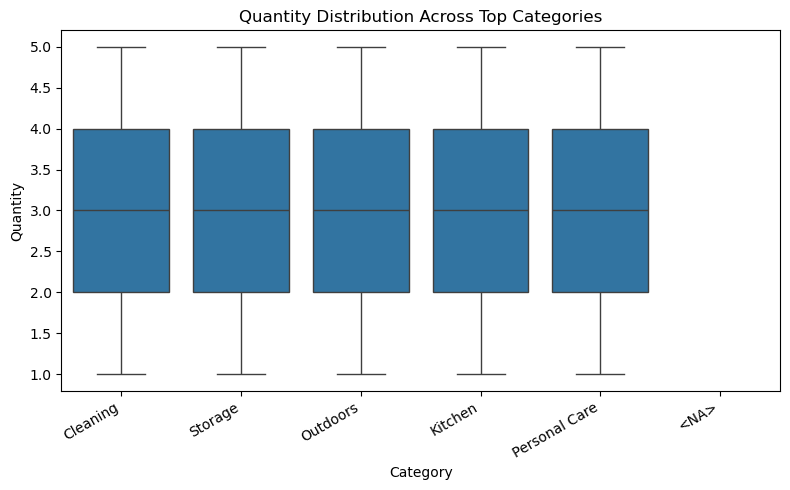

In [81]:
import seaborn as sns

cat_order = merged_df['category'].astype(str).value_counts().index.tolist()[:8]
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='category', y='quantity',
            order=cat_order, showfliers=False)
plt.title('Quantity Distribution Across Top Categories')
plt.xlabel('Category'); plt.ylabel('Quantity')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig(charts_dir / 'boxplot_quantity_by_category_seaborn.png', dpi=160, bbox_inches='tight')
plt.show()


In [ ]:
3) Matplotlib Boxplot - quantity vs discount across categories

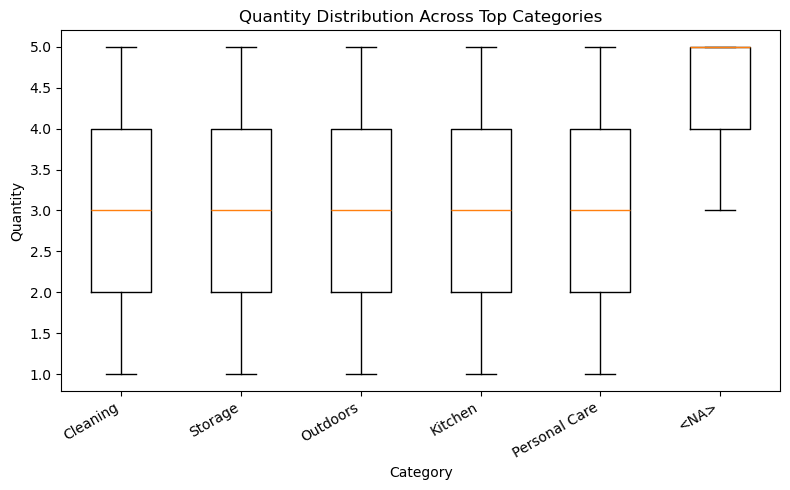

In [82]:

cat_order = merged_df['category'].astype(str).value_counts().index.tolist()[:8]
box_data = [
    merged_df.loc[merged_df['category'].astype(str) == c, 'quantity'].dropna().values
    for c in cat_order
]
plt.figure(figsize=(8,5))
plt.boxplot(box_data, tick_labels=cat_order, showfliers=False)  # <-- updated arg name
plt.title('Quantity Distribution Across Top Categories')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig(charts_dir / 'boxplot_quantity_by_category.png', dpi=160, bbox_inches='tight')
plt.show()


4) Heatmap - correlation between revenue, discount, and quantity 

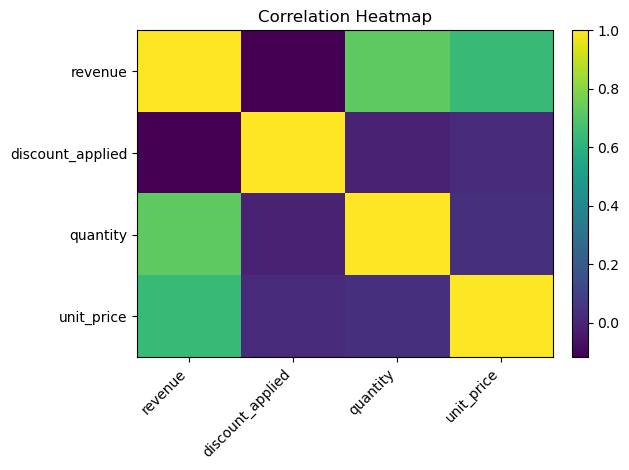

In [83]:
# 4) Heatmap: correlation among revenue, discount, quantity
corr_cols = ['revenue','discount_applied','quantity','unit_price']
corr_df = merged_df[corr_cols].copy()
corr = corr_df.corr(numeric_only=True)
plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(charts_dir/'corr_heatmap.png', dpi=160)
plt.show()


5) Countplot - orders by loyalty tier (with hue = region) 

In [84]:
# 5) Countplot equivalent: orders by loyalty tier (hue=region) -> grouped bars
counts = merged_df.groupby(['loyalty_tier','region']).agg(orders=('order_id','nunique')).reset_index()
tiers = counts['loyalty_tier'].unique().tolist()
regions = counts['region'].unique().tolist()
index = np.arange(len(tiers))
bar_width = 0.8 / max(1, len(regions))

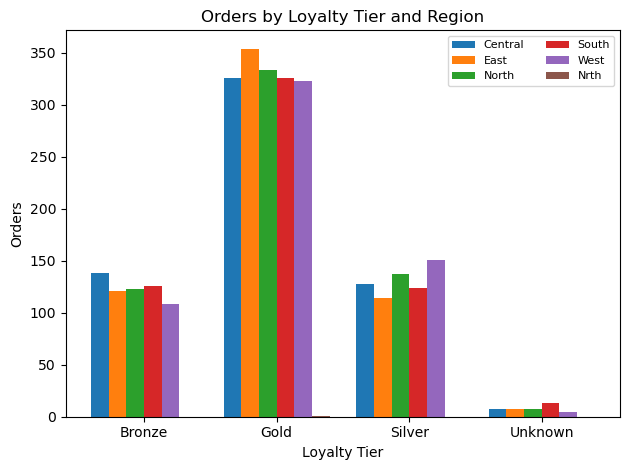

In [85]:
plt.figure()
for i, reg in enumerate(regions):
    vals = counts[counts['region']==reg].set_index('loyalty_tier').reindex(tiers)['orders'].fillna(0).values
    plt.bar(index + i*bar_width, vals, width=bar_width, label=str(reg))
plt.title('Orders by Loyalty Tier and Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Orders')
plt.xticks(index + (len(regions)-1)*bar_width/2, tiers, rotation=0)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.savefig(charts_dir/'orders_by_loyalty_tier_region.png', dpi=160)
plt.show()

6) Stacked bar- delivery status by price band 

Matplotlib - stacked bar delivery status by price band

In [96]:
# Build a summary of unique orders by price band and delivery status
grouped = (
    merged_df
        .groupby(['price_band', 'delivery_status'], observed=False, dropna=False)
        ['order_id'].nunique()
        .reset_index(name='orders')
)

# Pivot to wide format for a stacked bar
pivot_status = (
    grouped
        .pivot(index='price_band', columns='delivery_status', values='orders')
        .fillna(0)
        .astype(int)
)
display(pivot_status.head())  # quick check



delivery_status,Cancelled,Delayed,Delivered,Unknown
price_band,,,,
NaN,0,0,1,0
Low,108,187,194,2
Medium,220,438,456,1
High,263,545,580,2


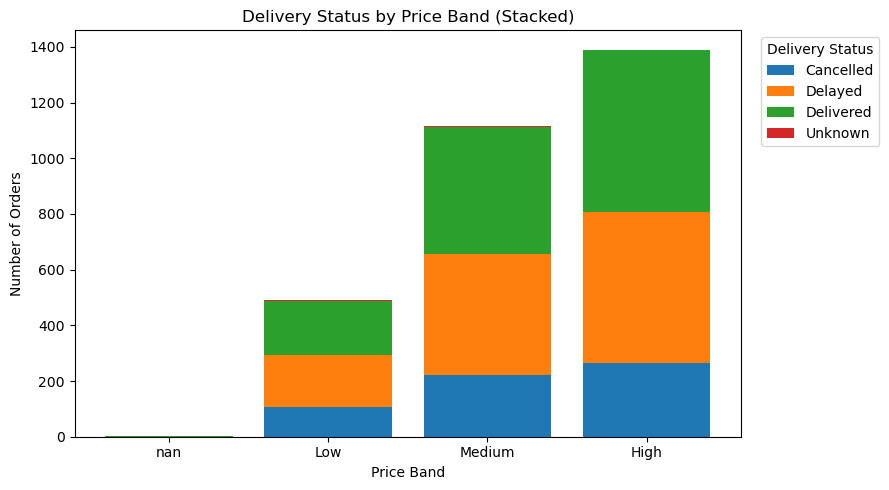

In [97]:
# Stacked bar: delivery status by price band
plt.figure(figsize=(9, 5))

bottom_vals = np.zeros(len(pivot_status))
for status in pivot_status.columns:
    counts = pivot_status[status].values
    plt.bar(pivot_status.index.astype(str), counts, bottom=bottom_vals, label=status)
    bottom_vals += counts

plt.title('Delivery Status by Price Band (Stacked)')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig(charts_dir / 'delivery_status_by_price_band_stacked.png', dpi=160, bbox_inches='tight')
plt.show()


Seaborn -Grouped bar:  

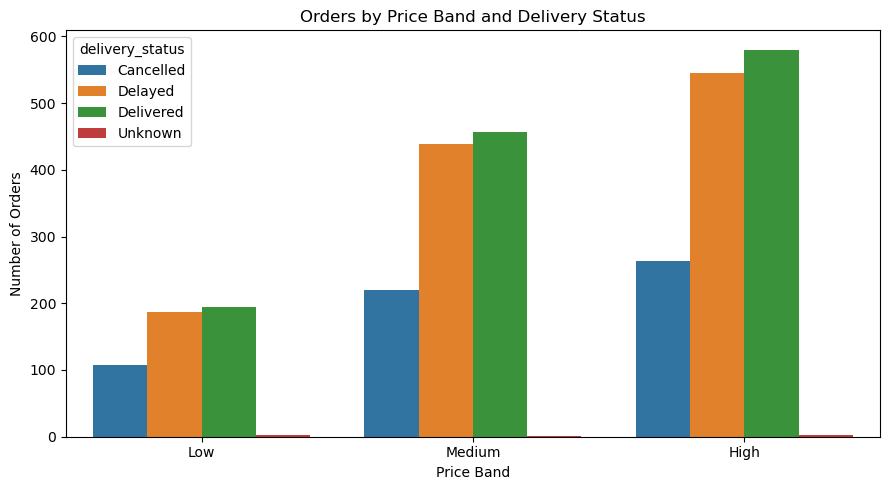

In [93]:
#  Orders by Price Band and Delivery Status (Grouped Bar)

plt.figure(figsize=(9,5))
sns.barplot(data=status_counts, x='price_band', y='orders', hue='delivery_status')

plt.title('Orders by Price Band and Delivery Status')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.tight_layout()

plt.savefig(charts_dir / 'delivery_status_by_price_band_grouped_seaborn.png', dpi=160, bbox_inches='tight')
plt.show()



6) Are certain regions struggling with delivery delays? 

<Axes: xlabel='region', ylabel='is_late'>

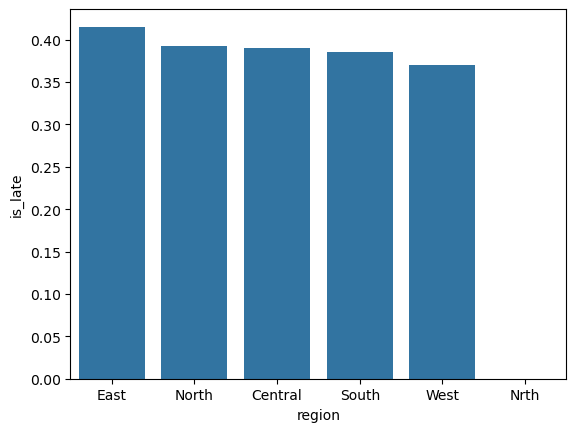

In [88]:
delay_rate = (
    merged_df.groupby('region')['is_late']
    .mean()
    .reset_index()
    .sort_values(by='is_late', ascending=False)
)
sns.barplot(data=delay_rate, x='region', y='is_late')


7) Do customer signup patterns influence purchasing activity? 

<Axes: xlabel='signup_month', ylabel='revenue'>

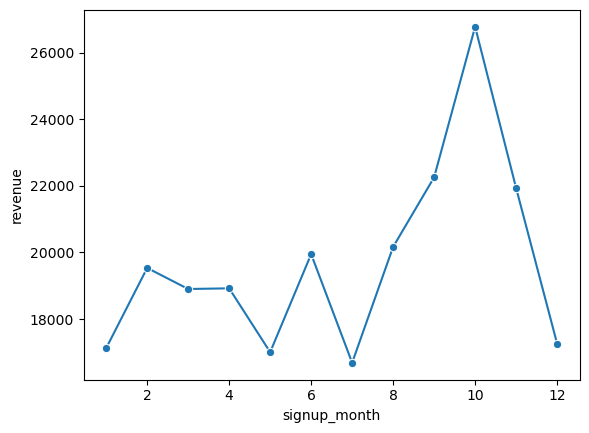

In [89]:
merged_df['signup_month'] = merged_df['signup_date'].dt.month
signup_activity = merged_df.groupby('signup_month')['revenue'].sum().reset_index()
sns.lineplot(data=signup_activity, x='signup_month', y='revenue', marker='o')
